In [1]:
import warnings
import os
import sys

warnings.filterwarnings('ignore')
current_dir = %pwd

parent_dir = os.path.abspath(os.path.join(current_dir, '../..'))

sys.path.append(parent_dir)

In [2]:
from src.main.models.naivebayes import Naivebayes
from src.main.utilities.utils import clean_text, stop_words_removal, stemming, count_vectorizer, get_dataset
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/francesco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# define model and pipeline
naivebayes = Naivebayes()
naivebayes.pipeline = [clean_text, stop_words_removal, stemming, count_vectorizer]

# import dataset and apply pipeline
inputs, targets = get_dataset()
inputs = naivebayes.run_pipeline(inputs, save=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/francesco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/francesco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/francesco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/francesco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/francesco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/francesco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/francesco/nltk_data...
[nltk_data]   Package stopwords i

Pipeline execution time: 0:00:08.870663


In [4]:
# stratified train test split
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42, stratify=targets)


In [5]:
# model training 
# search = logistic.grid_search(x_train, y_train, n_iter=5)
# search.best_estimator_
naivebayes.fit(x_train, y_train)

In [6]:
from sklearn.metrics import classification_report
from src.main.utilities import plotting

y_pred = naivebayes.predict(x_test)
print(classification_report(y_test, y_pred))
#results = plotting.compute_performance(y_test, y_pred)
#plotting.print_performance(results)


               precision    recall  f1-score   support

Entertainment       0.75      0.77      0.76      3827
         Life       0.89      0.93      0.91      8452
     Politics       0.87      0.92      0.89      6381
       Sports       0.89      0.56      0.69       873
       Voices       0.72      0.55      0.62      2115

     accuracy                           0.84     21648
    macro avg       0.82      0.75      0.77     21648
 weighted avg       0.84      0.84      0.84     21648



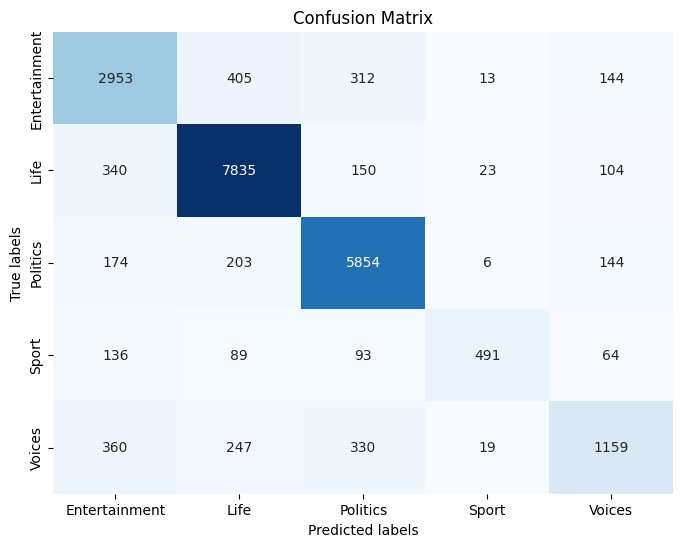

In [7]:
plotting.plot_confusion_matrix(y_test, y_pred)